In [3]:
import pandas as pd





In [5]:
df = pd.read_csv('event_data_train.csv')

In [4]:
df.shape

NameError: ignored

In [6]:
df.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
df.action.unique()


df['date'] = pd.to_datetime(df.timestamp, unit = 's')
df.head()
df.dtypes
df.date.min()

# dt - дата без времени
df['day']=df.date.dt.date
df.head()




,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [8]:
df.date.max()

Timestamp('2018-05-19 23:33:31')

In [ ]:
df.groupby('day').user_id.nunique().head() 


day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [ ]:
df1=df[1:]

#df1.sort_value()


AttributeError: ignored

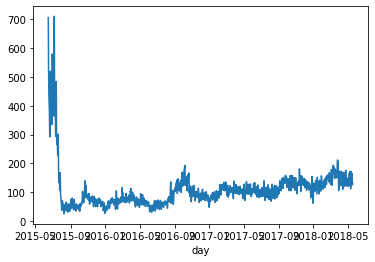

In [9]:
#df1.query("timestamp >= 1434340848	").groupby('day').user_id.nunique().plot()

df.groupby('day').user_id.nunique().plot()



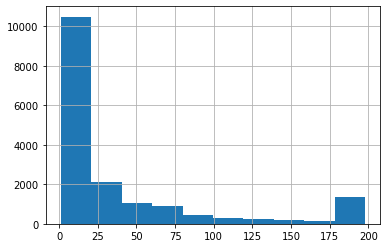

In [ ]:
df[df.action == 'passed'].groupby('user_id').agg({'step_id':'count'}).rename(columns = {'step_id':'passed_steps'}).passed_steps.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69ac475710>]],
      dtype=object)

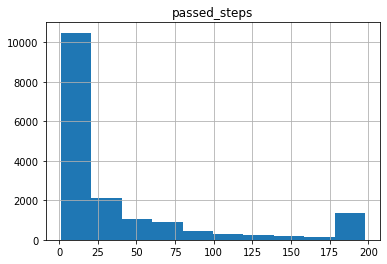

In [ ]:
df[df.action == 'passed'].groupby('user_id').agg({'step_id':'count'	}).rename(columns = {'step_id':'passed_steps'}).hist()

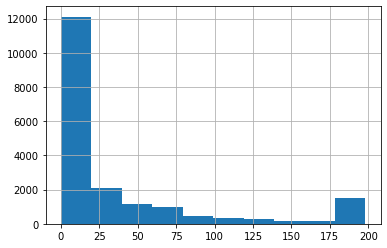

In [ ]:
df.pivot_table(index='user_id',
               columns='action',
               values='step_id',
               aggfunc='count',
               fill_value = 0).reset_index().discovered.hist()

In [7]:
sd = pd.read_csv('submissions_data_train.csv')

sd.head(10)

sd['date'] = pd.to_datetime(sd.timestamp, unit = 's')

sd['day'] = sd.date.dt.date

sd.head()


,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [2]:

sd = pd.read_csv('submissions_data_train.csv')

sd['date'] = pd.to_datetime(sd.timestamp, unit = 's')
sd['day'] = sd.date.dt.date

sd.head()




NameError: ignored

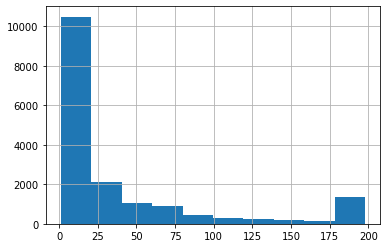

In [11]:
df[df.action == 'passed'].groupby('user_id').user_id.count().hist()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c94f8a7d0>]],
      dtype=object)

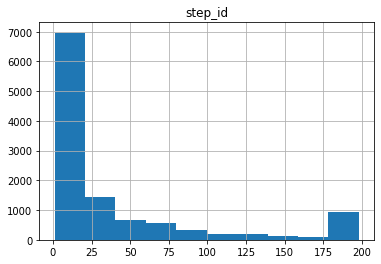

In [ ]:
df[df.action == 'passed'].groupby('user_id').agg({'step_id':'count'	}).hist()




In [62]:
#df['user_id' > 16758]
#df[df['action'] == 'viewed'].head()

#sd[['user_id', 'day','timestamp']]

#sd[['user_id', 'day','timestamp']].drop_duplicates(subset = ['user_id','day']).groupby('user_id').timestamp.head()

import numpy as np

sd[['user_id', 'day','timestamp']].drop_duplicates(subset = ['user_id','day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()

sd['priznak'] = sd.timestamp < 1434348123






,step_id,timestamp,submission_status,user_id,date,day,priznak
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,False
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,False
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,False
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,False
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,False
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15,False
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11,False
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15,True
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15,False
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16,False


In [1]:
sd.head(10)

NameError: ignored

In [9]:
#df.merge(sd, on = 'user_id', how = 'outer').head()


df


,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [2]:
sd

NameError: ignored